# Assignment 2 - Edmund's forum
### Names : Anisha Garg, Catherine McNabb, Cuiting Zhong, Lining Jiang, Kirti Pande 

## 1.
#### Develop a crawler/scraper using Selenium to fetch messages posted in Edmunds.com discussion forums. The crawler output should be a .csv file with the following columns: date, userid, and message (even though you will only use the messages in your analysis). Before you develop the crawler, carefully study one of the forums on Edmunds.com to understand the html as well as the threading structures. 

In [ ]:
#Creating  webdriver instance for scrapper
from selenium import webdriver
chrome_path = r'C:\Users\kirti\Downloads\chromedriver_win32\chromedriver.exe'

In [2]:
#Opeining chrome
driver = webdriver.Chrome(chrome_path)

In [6]:
#Going to the website in chrome
driver.get("https://forums.edmunds.com/categories/jaguar")

In [7]:
#For the first Question we have decided to go to the below link,scrape the website and store it in a csv file
python_button = driver.find_element_by_link_text("2018 Jaguar F-Type Lease Deals and Prices")
python_button.click()

In [8]:
#Using Beautiful Soup to get rid of blockQuotes
from bs4 import BeautifulSoup
cleantext = []
def readposts():
    soup = BeautifulSoup(driver.page_source, "html.parser")
    text = soup.find_all('div',{'class':'Message userContent'})
    for t in text:
        if t.find('blockquote'):
            try:
                cleantext.append(t.contents[2].strip())
            except:
                cleantext.append(u"")
        else:
            cleantext.append(t.contents[0].strip()) 
    return cleantext

In [9]:
import pandas as pd
d = {'date': [], 'userid': [], 'message': []}
df_old = pd.DataFrame(data=d)
df_new = pd.DataFrame(data=d)
def extract2():
    df = pd.DataFrame(data=d)
    user = driver.find_elements_by_class_name('Author')
    date = driver.find_elements_by_css_selector('.MItem.DateCreated') 
    posts = readposts()
    length = len(user)
    for i in range(length):
        df.loc[i] = [date[i].text,user[i].text,posts[i]]
    df = df.replace('\n',' ', regex=True)
    return df

In [10]:
for i in range(7):
    xpath = '//*[@id="PagerBefore"]/a[{0}]'.format(str(i+2))
    driver.find_element_by_xpath(xpath).click()
    df_new = extract2()
    df_old = pd.concat([df_old,df_new]).reset_index(drop=True)

In [11]:
df_old[df_old["message"] == ""] = 0
df_old = df_old[df_old['message'] != 0]

In [9]:
df_old.to_csv(r'C:\Users\kirti\Downloads\MSBA\Text_Analytics\Assignment_2\ta2Q1.csv')

## 2.
#### Fetch around 5,000 posts about cars from a General topics forum. Do NOT choose a forum dedicated to a particular brand or model. Instead, you can choose the General & Sedans categories and then select, for example, the Entry Level Luxury forum https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans .The idea is to have multiple brands and models being discussed without one of them being the focal point

##### We are using the url : https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans


In [16]:
# Create a new instance and go to the url mentioned above
driver = webdriver.Chrome(chrome_path)
driver.get("https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans")

In [15]:
#Scrapping the comments section to obtain posts from page 703 to 500
d2 = {'posts': []}
cleantext = []
for i in range(703,500,-1):
    cl = str(i)
    driver.find_element_by_link_text(cl).click()
    df_post = readposts()

In [17]:
#Since we got rid of blockquotes in the process; the empty entries after removing them are being filtered out
length = len(df_post)
df_o_post = list()
for i in range(length):
        if(df_post[i] !=''):
            df_o_post.append(df_post[i])

In [18]:
df_o_post = pd.Series(df_o_post)

In [19]:
#Writing 6000 entries to be on a safer side 
df_o_post = pd.Series(df_o_post.iloc[:6000])
df_o_post.to_csv(r'C:\Users\kirti\Downloads\MSBA\Text_Analytics\Assignment_2\ta2Q2.csv')

## 3.
#### Once you fetch the data, find the top 10 brands from frequency counts. You will need to write a script to count the frequencies. Be sure not to count a mention more than once per post, even if it is mentioned multiple times. Replace models with brands so that from now on you have to deal with only brands and not models. You will need another script for this job. This step is meant to help simplify the analysis. A list of model and brand names (not exhaustive) are provided in a separate file.   

In [142]:
#Importing the data we fetched
import pandas as pd
import re
file_encoding = 'cp1252'
df_posts=pd.read_csv(r'C:\Users\kirti\Downloads\MSBA\Text_Analytics\Assignment_2\ta2Q2.csv',header=None)
s_post=df_posts[1]
s_post=s_post[s_post.notnull()]

brand_model = pd.read_csv(r'C:\Users\kirti\Downloads\MSBA\Text_Analytics\Assignment_2\models.csv',encoding=file_encoding)

s_brand=brand_model['brand'].map(lambda x:x.lower())
s_brand=s_brand.map(lambda x:x.replace('.','').replace(',','').replace('-',' '))
s_model=brand_model['model'].map(lambda x:x.lower())
s_model=s_model.map(lambda x:x.replace('?',''))

In [143]:
#Converting the model into brand
import re
s_post_converted=s_post.map(lambda x:x.lower())

for i,m in enumerate(s_model):
    s_post_converted=s_post_converted.map(lambda x:re.sub(str(m), s_brand[i],str(x)))

In [144]:
#unique brand in the 'brand list' provided, but we can see that there are some words that are not brand, like 'seat', 'problem', etc.
brands=s_brand.unique()
brands

array(['acura', 'audi', 'bmw', 'buick', 'cadillac', 'car', 'chevrolet',
       'chrysler', 'dodge', 'ford', 'honda', 'hyndai kia', 'hyundai',
       'infiniti', 'kia', 'lincoln', 'mazda', 'mercedes', 'mercedes benz',
       'mercury', 'mitsubishi', 'nissan', 'pontiac', 'problem', 'saturn',
       'seat', 'sedan', 'subaru', 'suzuki', 'toyata', 'toyota',
       'volkswagen', 'volkwagen', 'volvo'], dtype=object)

In [145]:
#based on the above 'brand list', we make a new true brand list
brands_edited=['acura', 'audi', 'bmw', 'buick', 'cadillac',  'chevrolet',
       'chrysler', 'dodge', 'ford', 'honda', 'hyundai',
       'infiniti', 'kia', 'lincoln', 'mazda', 'mercedes', 
       'mercury', 'mitsubishi', 'nissan', 'pontiac',  'saturn', 'subaru', 'suzuki', 'toyota',
       'volkswagen', 'volvo']

In [146]:
#For each post, we check for if each brand in it
def brand_in_it(brand,post):
    ''' to check if a brand in a post'''
    if brand in post:
        return 1
    else: 
        return 0

temp={'post': s_post_converted}
for brand in brands_edited:
    temp[brand]=s_post_converted.map(lambda x:brand_in_it(brand,x))

In [188]:
#Top 10 brands from the frequency counts are as follows
df2=pd.DataFrame(temp) 
#df2: first column is posts with each post in each cell, second column and after are brand names with binary value in each cell
s_A=df2.drop('post',axis=1).sum() 
s_A = s_A.sort_values(ascending=False).head(10)
print ("Top 10 brands:\n", s_A)

Top 10 brands: 
 bmw           702
audi          554
acura         296
honda         218
chrysler      157
volkswagen    152
infiniti      148
ford          128
nissan        122
hyundai       118
dtype: int64


## Task A:
#### Identify top 10 brands by frequency. From the posts, calculate lift ratios for associations between the brands. You will have to write a script to do this task). Show the brands on a multi-dimensional scaling (MDS) map (use a Python script for MDS, there are multiple scripts available on the Internet). 

In [148]:
#Top 10 brands by frequency
brands_edited_top_10 = s_A.index.values
brands_edited_top_10

array(['bmw', 'audi', 'acura', 'honda', 'chrysler', 'volkswagen',
       'infiniti', 'ford', 'nissan', 'hyundai'], dtype=object)

In [149]:
#association of brand A and brand B
def brandAB_in_it(brandA,brandB,post):
    if brandA in post and brandB in post:
        return 1
    else: 
        return 0
temp2={'post': s_post_converted}

#Filterign for only the top 10 brands
for brandA in brands_edited_top_10:
    for brandB in brands_edited_top_10:
        temp2[brandA+', '+brandB]=s_post_converted.map(lambda x:brandAB_in_it(brandA,brandB,x))

In [150]:
df3=pd.DataFrame(temp2)
df4=df3.drop('post',axis=1)

In [151]:
m_AB=df4.sum().values.reshape([10,10])  #get the count of association
df_AB=pd.DataFrame(m_AB)
#setting the column name and index
df_AB.columns=brands_edited_top_10
df_AB=df_AB.set_index(pd.Series(brands_edited_top_10))

In [152]:
N=len(s_post)
df_lift=df_AB.copy()
#Lift calculation for top 10 brands
for i in range(10):
    for j in range(10):
        df_lift.iloc[i,j]=N*df_AB.iloc[i,j]/(s_A[i]*s_A[j])
df_lift

,bmw,audi,acura,honda,chrysler,volkswagen,infiniti,ford,nissan,hyundai
bmw,6.500000,1.454874,1.229730,1.162844,0.414013,0.684211,1.581081,1.472656,1.385246,1.211864
audi,1.454874,8.236462,1.697379,1.133458,1.206615,2.763550,3.227803,1.029558,1.620288,1.326210
acura,1.229730,1.697379,15.415541,4.879231,5.007596,0.912762,3.228931,1.083905,1.263569,1.437042
honda,1.162844,1.133458,4.879231,20.931193,4.266230,2.478694,1.272843,2.943449,2.230373,1.241681
chrysler,0.414013,1.206615,5.007596,4.266230,29.063694,0.573626,0.589129,1.816481,0.238227,0.738907
volkswagen,0.684211,2.763550,0.912762,2.478694,0.573626,30.019737,0.000000,4.221525,1.968507,2.035236
infiniti,1.581081,3.227803,3.228931,1.272843,0.589129,0.000000,30.831081,0.722603,3.032565,0.783841
ford,1.472656,1.029558,1.083905,2.943449,1.816481,4.221525,0.722603,35.648438,1.168801,1.510527
nissan,1.385246,1.620288,1.263569,2.230373,0.238227,1.968507,3.032565,1.168801,37.401639,2.218741
hyundai,1.211864,1.326210,1.437042,1.241681,0.738907,2.035236,0.783841,1.510527,2.218741,38.669492


In [153]:
#Dissimilarity Matrix
df_lift_r=1/df_lift

for i in range(10):
    df_lift_r.iloc[i,i]=0
df_lift_r

,bmw,audi,acura,honda,chrysler,volkswagen,infiniti,ford,nissan,hyundai
bmw,0.000000,0.687345,0.813187,0.859961,2.415385,1.461538,0.632479,0.679045,0.721893,0.825175
audi,0.687345,0.000000,0.589144,0.882256,0.828764,0.361853,0.309808,0.971291,0.617174,0.754028
acura,0.813187,0.589144,0.000000,0.204950,0.199697,1.095576,0.309700,0.922590,0.791409,0.695874
honda,0.859961,0.882256,0.204950,0.000000,0.234399,0.403438,0.785643,0.339738,0.448356,0.805360
chrysler,2.415385,0.828764,0.199697,0.234399,0.000000,1.743298,1.697421,0.550515,4.197677,1.353349
volkswagen,1.461538,0.361853,1.095576,0.403438,1.743298,0.000000,inf,0.236881,0.507999,0.491343
infiniti,0.632479,0.309808,0.309700,0.785643,1.697421,inf,0.000000,1.383885,0.329754,1.275769
ford,0.679045,0.971291,0.922590,0.339738,0.550515,0.236881,1.383885,0.000000,0.855577,0.662021
nissan,0.721893,0.617174,0.791409,0.448356,4.197677,0.507999,0.329754,0.855577,0.000000,0.450706
hyundai,0.825175,0.754028,0.695874,0.805360,1.353349,0.491343,1.275769,0.662021,0.450706,0.000000


#### MDS plot code

In [154]:
m_lift=df_lift_r.values
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import sklearn

MDS_cars = sklearn.manifold.MDS(n_components=2, metric=True, dissimilarity='precomputed')

#Operations on dissimilarity matrix to read into MDS function
dissimilarity = df_lift_r.replace([np.inf, -np.inf], np.nan)
dissimilarity.fillna(999, inplace=True)
npos = MDS_cars.fit_transform(dissimilarity)

seed = np.random.RandomState(seed=99)
mds = manifold.MDS(n_components=2, max_iter=20000, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
x_mds= mds.fit(dissimilarity.astype(np.float32)).embedding_
x_mds = x_mds[[0,1,2,3,4,7,8,9]]  #removing the outliers

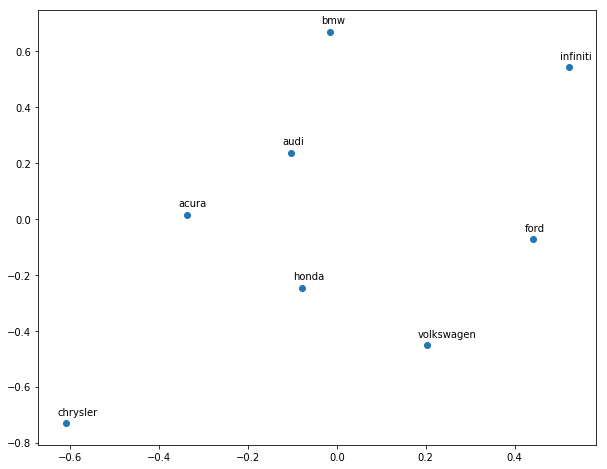

In [240]:
fig = plt.figure(figsize=(10, 8))
x=x_mds[:,0]
y=x_mds[:,1]

label=df_lift.columns.values
plt.scatter(x, y)
for i in range(8):
    plt.text(x[i]-0.02,y[i]+0.03,label[i])
plt.show()

## Task B



## Task C: 
#### What are 5 most frequently mentioned attributes of cars in the discussions? Note that the same attribute may be described by different words – e.g., pick-up and acceleration may both refer to a more general attribute, “performance”. You have to make suitable replacements. Now pick the 5 most frequently mentioned brands. Which attributes are most strongly associated with which of these 5 brands? You DON’T have to do a sentiment analysis for this assignment.

In [156]:
import pandas as pd
import re
df_posts=pd.read_csv(r'C:\Users\kirti\Downloads\MSBA\Text_Analytics\Assignment_2\ta2Q2.csv',header=None)
s_post=df_posts[1]
s_post=s_post[s_post.notnull()]

brands = ['acura', 'audi', 'bmw', 'buick', 'cadillac',  'chevrolet',
       'chrysler', 'dodge', 'ford', 'honda', 'hyundai',
       'infiniti', 'kia', 'lincoln', 'mazda', 'mercedes',
       'mercury', 'mitsubishi', 'nissan', 'pontiac',  'saturn', 'subaru', 'suzuki', 'toyota',
       'volkswagen', 'volvo']

brand_model = pd.read_csv(r'C:\Users\kirti\Downloads\MSBA\Text_Analytics\Assignment_2\models_new.csv',encoding=file_encoding)
#Cleaning basic text
s_brand=brand_model['Brand'].map(lambda x:x.lower())
s_brand=s_brand.map(lambda x:x.replace('.','').replace(',','').replace('-',' '))
s_model=brand_model['Model'].map(lambda x:x.lower())
s_model=s_model.map(lambda x:x.replace('?',''))

sub_super=pd.read_csv(r'C:\Users\kirti\Downloads\MSBA\Text_Analytics\Assignment_2\attributes.csv')
attribute_dict = dict(zip(sub_super.iloc[:,0], sub_super.iloc[:,1]))

In [157]:
import re
s_post_converted=s_post.map(lambda x:x.lower())

for i,m in enumerate(s_model):
    s_post_converted=s_post_converted.map(lambda x:re.sub(str(m), s_brand[i],str(x)))

In [158]:
def remove_pun(text):
    '''remove all those punctuations
    and add a space before and after each brand name'''
    pun=['.',',',';',':','\\','?','(',')','-','"','/','\'s']
    for p in pun:
        text=text.replace(p,' ')
    for brand in brands:
        text=text.replace(brand,' '+brand+' ')
    return text

posts_nopun=s_post_converted.map(lambda x:remove_pun(str(x)))

In [159]:
from nltk.corpus import stopwords

def remove_stp(text):
    '''remove stopwords'''
    stp_removed = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return stp_removed

posts_nostp=posts_nopun.map(lambda x:remove_stp(x))

In [160]:
# first check if a brand in a text and import re
def find_idx(brand, text): 
    ''' find the indexs of a brand in a post;
        check if a brand in a post first,
        and need to import re'''
    total_count=len(re.findall(brand,text))
    token=text.split()
    idx_temp = token.index(brand)
    idx=idx_temp
    idx_list=[idx]
    count=1
    while idx<len(token) and count<total_count:
        idx_temp = token[idx+1:].index(brand)
        idx=idx+idx_temp+1
        idx_list.append(idx) 
        count+=1
    return idx_list

In [161]:
def features(brand,text):
    '''find feature list for a brand in a post
    using find_idx function to get the indexs of a brand in a post,
    and then take +5 and -5 words based on these indexs'''
    idx_list=find_idx(brand,text)
    token=text.split()
    feature_list=[]
    for i in idx_list:
        feature_list=feature_list+token[max(0,i-5):i]+token[i+1:min(i+6,len(token))]
    return feature_list

In [162]:
def find_attr(brand, text):
    '''find the unique general attribute in a post for a brand
       convert the features into general attributes using pre-defined attribute_dict'''
    if brand in text:
        f=features(brand, text)
        attribute=pd.Series([attribute_dict.get(w) for w in f])
        attribute=attribute[attribute.notnull()]
        result=list(attribute)#.unique()) 
    else:
        result=[]
    return result

In [164]:
# find the top 5 most frequently mentioned attributes
def find_total_attr(text):
    '''find any atribute mentioned in a post'''
    attribute=pd.Series([attribute_dict.get(w) for w in text.split()])
    attribute=attribute[attribute.notnull()]
    return list(attribute)

total_attr=posts_nostp.map(lambda x:find_total_attr(x)).sum()
pd.Series(total_attr).value_counts()

performance       2432
comfort            514
sustainability     473
cost               462
mpg                365
safety             241
appearance         219
emission            27
dtype: int64

In [249]:
# find the top 5 most frequently mentioned attributes associated with a brand
# top 5 brand: bmw, audi, honda, acura, chrysler
top_brand=['bmw', 'chrysler', 'audi', 'honda', 'acura']
attr={}
for brand in top_brand:
    attr[brand]=posts_nostp.map(lambda x:find_attr(brand,x))

In [250]:
s_bmw=pd.Series(attr['bmw'].sum()).value_counts()
s_chrysler=pd.Series(attr['chrysler'].sum()).value_counts()
s_audi=pd.Series(attr['audi'].sum()).value_counts()
s_honda=pd.Series(attr['honda'].sum()).value_counts()
s_acura=pd.Series(attr['acura'].sum()).value_counts()
df_attr=pd.concat((s_bmw,s_chrysler,s_audi,s_honda,s_acura),axis=1,sort=False)
df_attr.columns=top_brand

In [261]:
df_attr

,bmw,chrysler,audi,honda,acura
performance,454,1.0,504,59.0,277
cost,76,NaN,84,12.0,45
sustainability,74,2.0,79,7.0,24
comfort,64,3.0,92,13.0,54
mpg,38,NaN,71,14.0,30
appearance,28,1.0,36,10.0,22
safety,21,NaN,39,7.0,13
emission,4,NaN,3,NaN,4


## Task D: 
#### What advice will you give to a (i) product manager, and (ii) marketing/advertising manager of these brands based on your analysis in Task C? For this assignment, you can assume the sentiment (e.g., that it is positive). 

## Task E: 
#### Which is the most aspirational brand in your data in terms of people actually wanting to buy or own? Describe your analysis. What are the business implications for this brand?

The question requires us to find the most aspirational brands, here we are taking into account aspirational bigrams mentioned below and calculating the lift between them and the brands in each post. The brand with the highest lift indicates a larger aspiration rate. We have taken a limit of +5 and -5 words from the location of the brand to avoid influence by the occurences of other brands on the brand in focus.

Calculation of lift: Lift = P(A,B)/(P(A) P(B)) = (n(A,B) N)/ (n(A) * n(B)) 
In our case, A -> Brand B -> Aspiration words N -> number of posts 
P(A,B) = n(A,B)/N n(A,B) -> number of posts for each brand which indicates aspiration
P(A) ->n(A)/N n(A) -> number of posts which have a brand influence
P(B) ->n(B)/N n(B) -> For each brand,the number of brands which indicate aspiration to buy the car!

In [268]:
#filterv and filterv2 have the aspirational bigram combinations
filterv = ['love','hope','want','wish','dream','desire','crave','buy','purchase','wanted','always']
filterv1= ['hope','want','wish','dream','desire','crave','buy','purchase','wanted','always']
filterv2 = ['to','have','car','it','of','this']
filter_set = set(filterv)
filter_set2 = set(filterv2)

#function to return the occurence of aspirtaional bigrams for every brand
def find(brand,text):
    list_bg = []
    if(brand in text):
        f=features(brand,text)
        bg = list(zip(*[f[i:] for i in range(2)]))
        for i,j in enumerate(bg):
                if(len(j) != 0):
#                     if((j[0] in filter_set) & (j[1] in filter_set2)):
                      if((j[0] in filter_set)):
                         list_bg.append(j)
        return len(list_bg)

In [269]:
brand_asp = {}
for brand in brands:
    brand_asp[brand] = posts_nopun.map(lambda x: find(brand,x))

In [270]:
#Creating a dataframe to calculate number of posts with aspirations for every brand(asp_brand) 
#and number of posts with aspirations

asp_table = pd.DataFrame(columns = brands)
for brand in brands:
    asp_table[brand]=brand_asp[brand]
asp_table2 = asp_table.fillna(0)

asp_entries = asp_table2.sum(axis=1)
asp_brand = asp_table2[asp_table2 > 0].count(axis = 0)
no_asp = 0
for i in asp_entries.iteritems():
    if(i[1]>0):
        no_asp +=1

In [176]:
# asp_table

In [271]:
#Calculating number of posts with brands mentioned
#Creating a dataframe with required values to calculate lift
bc = []
aspiration = pd.DataFrame(columns=['brand','asp_brand_count','brand_occurence'])
aspiration['brand'] = brands
for brand in brands:
    count = 0
    for i in asp_table[brand].iteritems():
        if(math.isnan(i[1]) == False):
            count = count + 1
    bc.append(count)
aspiration['asp_brand_count'] = asp_brand.values
aspiration['brand_occurence'] = bc

In [272]:
#Calculate lift for each brand = (n(posts with brand & aspiration)*len(posts))/(n(posts with aspirations)*n(posts with brand))
aspiration['lift'] = (aspiration['asp_brand_count']*len(posts_nopun))/(no_asp * aspiration['brand_occurence'])
print("Top 5 Aspirational brands:")
aspiration.sort_values(by='lift',ascending=False)[:5]

Top 5 Aspirational brands:


,brand,asp_brand_count,brand_occurence,lift
12,kia,8,81,2.198374
21,subaru,5,69,1.612937
2,bmw,59,927,1.416671
23,toyota,6,98,1.362768
5,chevrolet,3,56,1.192422
